# Running stochastic simulations 

To perform stochastic simulations, we will use [StochPy](http://stochpy.sourceforge.net), a Python module.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import stochpy 
smod= stochpy.SSA()


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

- - - 
## Investigating individual trajectories

We will start with a simple model of gene expression: the birth-death process, which has a constant rate of synthesis, or birth, and a constant rate of degradation, or death.

In <tt>StochPy</tt>, we must define each reaction individually in a text file. The file <tt>birth_death.psc</tt> specifies the birth-death model and contains the following: 

```

# Reactions
R1:
    $pool > A
    k
R2:
    A > $pool
    d*A

# Initial values
A= 0

# Parameters
k= 0.1
d= 0.01

```

In [28]:
# birth rate
k0= 0.5
# death rate
d0= 0.05

# final time of simulation
tf= 150

In [29]:
# deterministic version based on rate equations
def birthdeath(a, t, k, d):
    dadt = -a*d + k
    return dadt

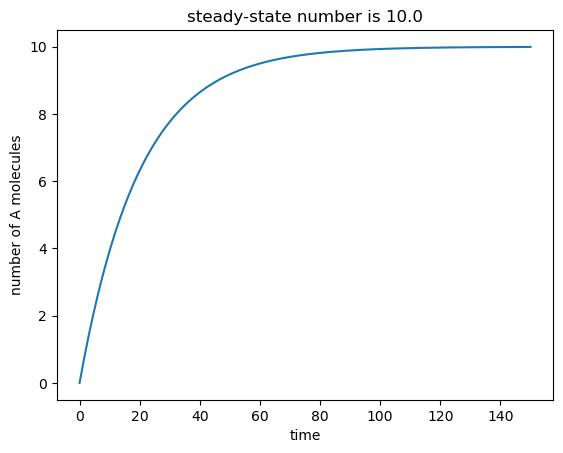

In [30]:
# simulate deterministically
t= np.linspace(0, tf, 200)
adet= odeint(birthdeath, [0], t, args= (k0, d0))

plt.figure()
plt.plot(t, adet)
plt.xlabel('time')
plt.ylabel('number of A molecules')
plt.title('steady-state number is {:.1f}'.format(adet[-1][0]))
plt.show()

In [21]:
adet.shape

(200, 1)

In [ ]:
# load the stochastic birth-death model 
# smod = stochpy.SSA()
# stochpy.SSA().Model
#smod.Model('birth_death.psc', dir= '../lectures/noise/model_files')
#smod.ChangeParameter('k', k0)
#smod.ChangeParameter('d', d0)

In [31]:
# load the stochastic birth-death model 
# smod = stochpy.SSA()
# stochpy.SSA().Model
smod.Model('birth_death.psc', dir = ".")
smod.ChangeParameter('k', k0) # 这两句的意思是把psb里的参数改为自己定义的参数
smod.ChangeParameter('d', d0)

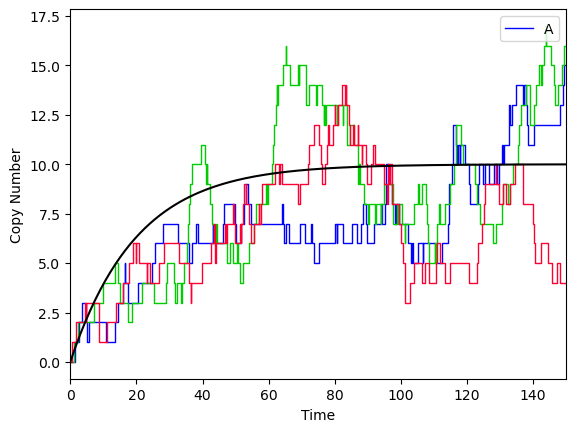

In [32]:
# simulate stochastically

smod.DoStochSim(end= tf, mode= 'time', trajectories= 3, quiet= False)

# plot the results
smod.PlotSpeciesTimeSeries()
# deterministic solution
plt.plot(t, adet, 'k-')
plt.xlim([0, tf])
plt.show()

## 黑色的线是mean，三条不同颜色的线是模拟出来的三条轨迹线

## Investigating the distributions of numbers of proteins

In [ ]:
smod.DoStochSim(end= tf, mode= 'time', trajectories= 1000, quiet= False)

In [33]:
# run many simulations
smod.DoStochSim(end= tf, mode= 'time', trajectories= 1000, quiet= False)

# put the trajectories on a grid - a matrix - with regularly spaced time points
ns= 100
timesavailable= np.linspace(0, tf, ns)
smod.GetRegularGrid(n_samples= ns)
# each row is one trajectory
data= np.transpose(smod.data_stochsim_grid.species[0])

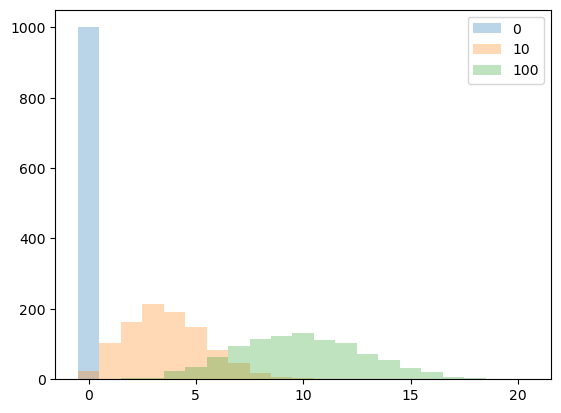

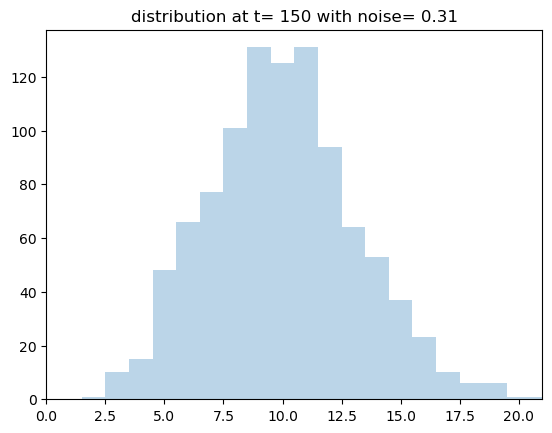

In [34]:
# use bar to plot the distributions at **particular times**
timesofinterest= np.array([0, 10, 100])

plt.figure()
for tp in timesofinterest:
    # find the data nearest to the time of interest
    i= np.nonzero(timesavailable > tp)[0][0] - 1
    # bin across trajectories at the time of interest
    labels, counts= np.unique(data[i, :], return_counts= True)
    # plot the result
    plt.bar(labels, counts, align= 'center', width= 1, alpha= 0.3, label= str(tp))
plt.legend()
plt.show()

# plot the distribution at tf
plt.figure()
labels, counts= np.unique(data[-1, :], return_counts= True)
plt.bar(labels, counts, align= 'center', width= 1, alpha= 0.3, label= str(tp))
# estimate level of noise
noise= np.std(data[-1,:])/np.mean(data[-1,:])
plt.title('distribution at t= {} with noise= {:.2f}'.format(tf, noise))
plt.xlim([0, np.max(labels)])
plt.show()

## A more complicated network 

The repressilator, a synthetic oscillator, comprises three mRNAs and three proteins. The model is specified in the file <tt>repressilator.psc</tt>, which contains the following:

```
    
# Reactions
R1:
    $pool > m1
    a*(1/(1+p3**2))
R2:
    $pool > m2
    a*(1/(1+p1**2))
R3:
    $pool > m3
    a*(1/(1+p2**2))
R4:
    m1 > $pool
    d*m1
R5:
    m2 > $pool
    d*m2
R6:
    m3 > $pool
    d*m3
R7:
    $pool > p1
    b*m1
R8:
    $pool > p2
    b*m2
R9:
    $pool > p3
    b*m3
R10:
    p1 > $pool
    b*p1
R11:
    p2 > $pool
    b*p2
R12:
    p3 > $pool
    b*p3

# Initial values
m1 = 1
p1 = 4
m2 = 4
p2 = 2
m3 = 15
p3 = 13

# Parameters
a= 100
b= 0.1
d= 1
    
```

In [22]:
# load the stochastic repressilator
#smod.Model('repressilator.psc', dir= '../lectures/noise/model_files')

In [35]:
smod.Model('repressilator.psc', dir= '.')

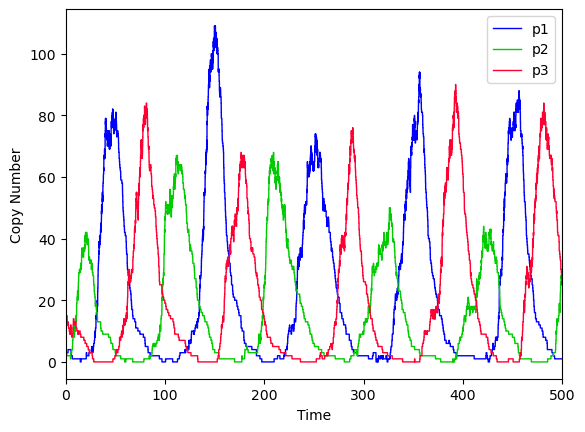

In [38]:
# run the simulation
tf= 500
smod.DoStochSim(end= tf, mode= 'time', trajectories= 1, quiet= False)

# plot the results
smod.PlotSpeciesTimeSeries(species2plot =['p1', 'p2', 'p3'])
plt.xlim([0, tf])
plt.show()